In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/it/train.jsonl
/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/ar/train.jsonl
/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/es/train.jsonl
/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/ja/train.jsonl
/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/fr/train.jsonl
/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/de/train.jsonl


# Import Libraries and Tools

In [5]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [3]:
# Define file paths in a dictionary
file_paths = {
    'it': '/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/it/train.jsonl',
    'ar': '/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/ar/train.jsonl',
    'es': '/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/es/train.jsonl',
    'ja': '/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/ja/train.jsonl',
    'fr': '/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/fr/train.jsonl',
    'de': '/kaggle/input/task-2-ea-mt-entity-aware-machine-translation/semeval/train/de/train.jsonl'
}

# Load data from all files
data = {}
for lang, path in file_paths.items():
    with open(path, 'r', encoding='utf-8') as file:
        data[lang] = [json.loads(line) for line in file]

# Display a sample from each language
for lang, entries in data.items():
    print(f"First entry in {lang}:")
    print(entries[0])
    print('-' * 50)

First entry in it:
{'id': 'bff78c91', 'source_locale': 'en', 'target_locale': 'it', 'source': 'What year was the first book of the A Song of Ice and Fire series published?', 'target': 'In che anno venne pubblicato il primo libro della serie Cronache del Ghiaccio e del Fuoco?', 'entities': ['Q45875'], 'from': 'mintaka'}
--------------------------------------------------
First entry in ar:
{'id': 'a9011ddf', 'source_locale': 'en', 'target_locale': 'ar', 'source': 'What is the seventh tallest mountain in North America?', 'target': 'ما سابع أعلى جبل في أمريكا الشمالية؟', 'entities': ['Q49'], 'from': 'mintaka'}
--------------------------------------------------
First entry in es:
{'id': '2723bb1b', 'source_locale': 'en', 'target_locale': 'es', 'source': 'Which actor was the star of Titanic and was born in Los Angeles, California?', 'target': '¿Qué actor protagonizó Titanic y nació en Los Ángeles, California?', 'entities': ['Q65'], 'from': 'mintaka'}
-----------------------------------------

In [4]:
# Count the number of records for each language
record_counts = {lang: len(entries) for lang, entries in data.items()}

# Display the counts
for lang, count in record_counts.items():
    print(f"Language: {lang}, Number of Records: {count}")

Language: it, Number of Records: 3739
Language: ar, Number of Records: 7220
Language: es, Number of Records: 5160
Language: ja, Number of Records: 7225
Language: fr, Number of Records: 5531
Language: de, Number of Records: 4087


In [12]:
# Define the plotting function
def plot_text_length_distribution(df, dataset_name, column_name, color):
    """
    Plots the distribution of text lengths.
    
    Parameters:
        df (pd.DataFrame): Dataset containing text data.
        dataset_name (str): Name of the dataset.
    """
    df['source_length'] = df[column_name].apply(len)
    
    plt.figure(figsize=(7, 3))
    sns.histplot(df[f'{column_name}_length'], bins=50, kde=True, color=color)
    plt.title(f'Source Text Length Distribution - {dataset_name}')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


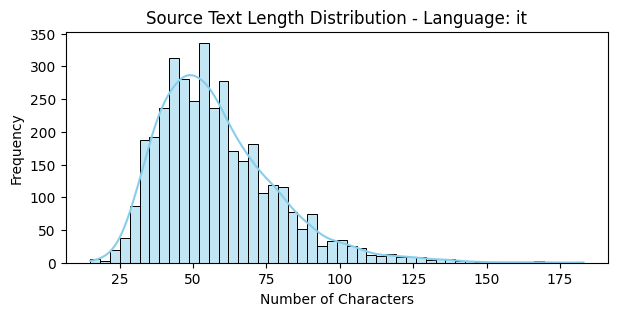

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


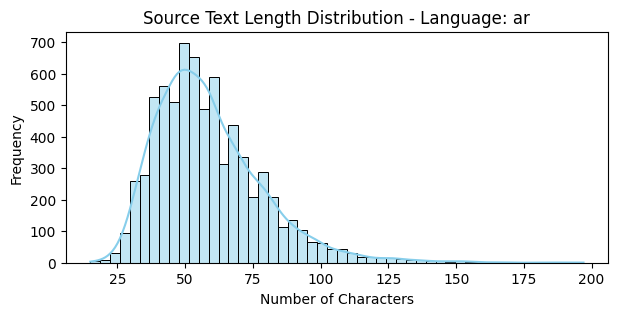

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


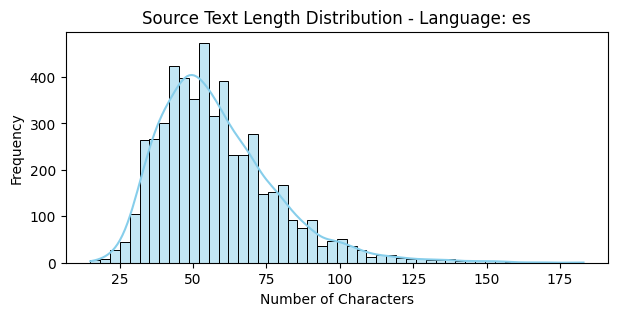

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


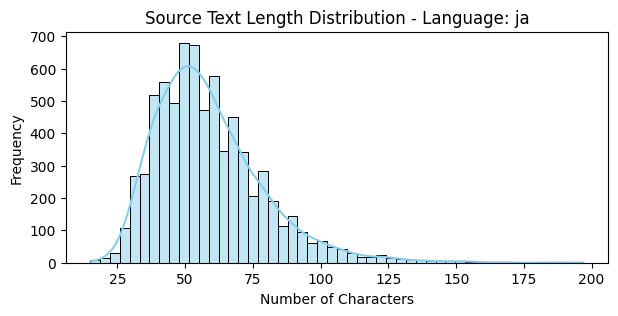

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


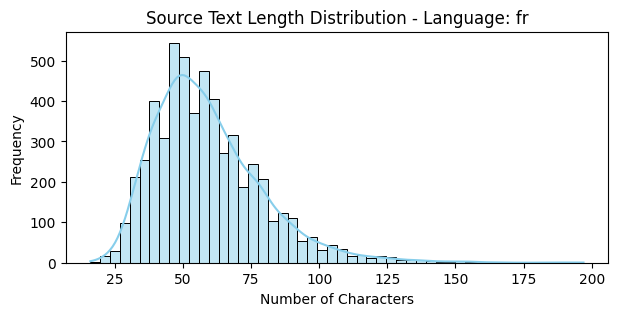

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


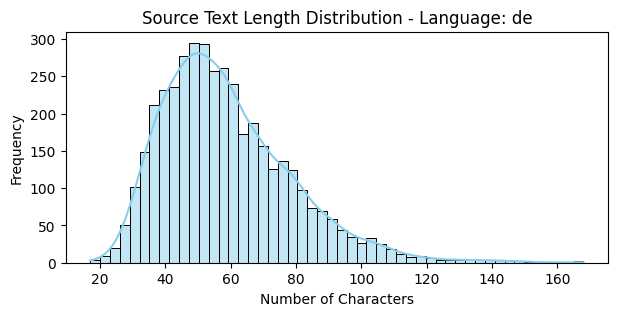

In [13]:
# Process and plot for each language
for lang, entries in data.items():
    # Create a DataFrame for the current language
    df = pd.DataFrame(entries)
    
    # Check if 'source' exists in the dataset
    if 'source' in df.columns:
        plot_text_length_distribution(df, f'Language: {lang}', 'source', 'skyblue')
    else:
        print(f"'source' property not found in the dataset for language: {lang}")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


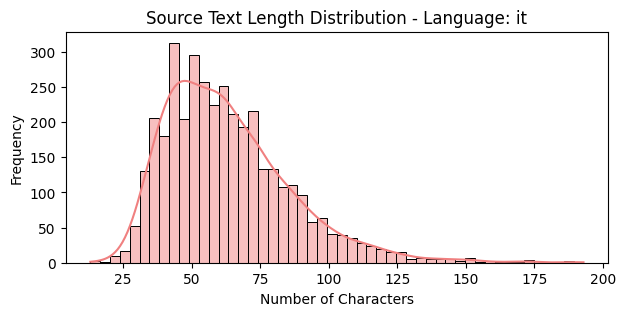

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


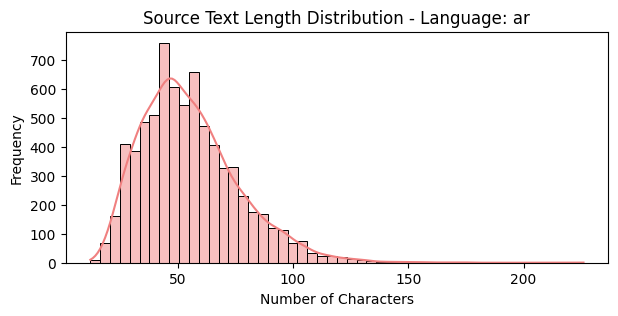

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


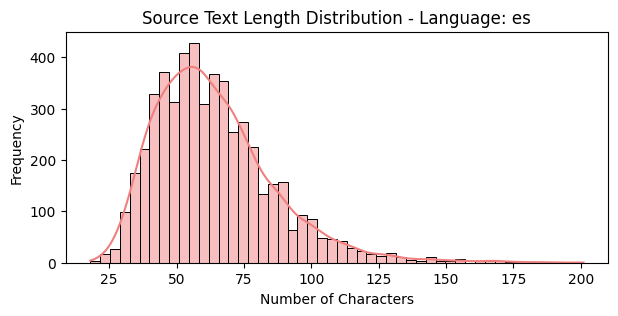

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


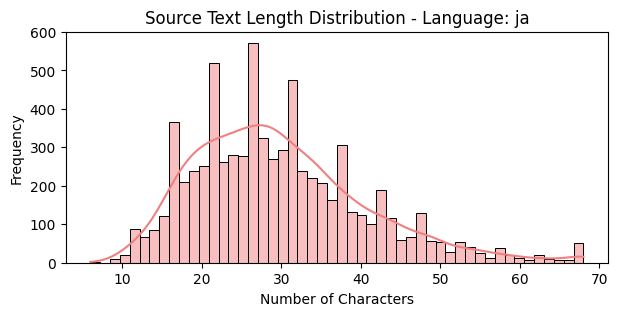

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


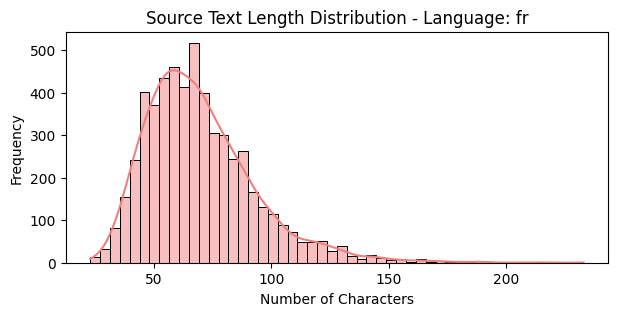

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


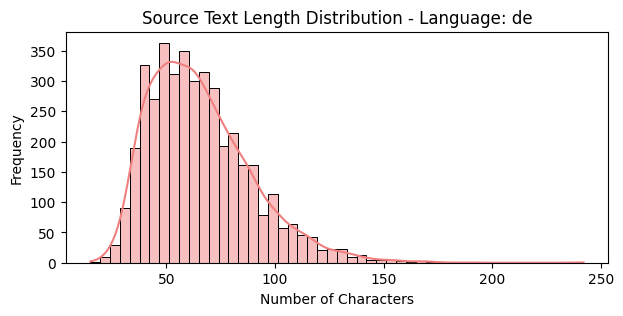

In [14]:
# Process and plot for each language
for lang, entries in data.items():
    # Create a DataFrame for the current language
    df = pd.DataFrame(entries)
    
    # Check if 'source' exists in the dataset
    if 'target' in df.columns:
        plot_text_length_distribution(df, f'Language: {lang}', 'target', 'lightcoral')
    else:
        print(f"'source' property not found in the dataset for language: {lang}")